<a href="https://colab.research.google.com/github/GMouraBFR/analise_NVIDEA/blob/main/NVIDEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comportamento do preço da NVIDIA (NVDA) e sua relação com variáveis macroeconômicas**

In [ ]:
!pip install yfinance pandas matplotlib seaborn


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Baixar dados históricos da NVIDIA
nvidia = yf.Ticker("NVDA")
df = nvidia.history(period="max")

# Mostrar as primeiras linhas dos dados
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0


# **Gráfico do Preço de Fechamento**

 Mostra o crescimento da NVIDIA ao longo dos anos.**

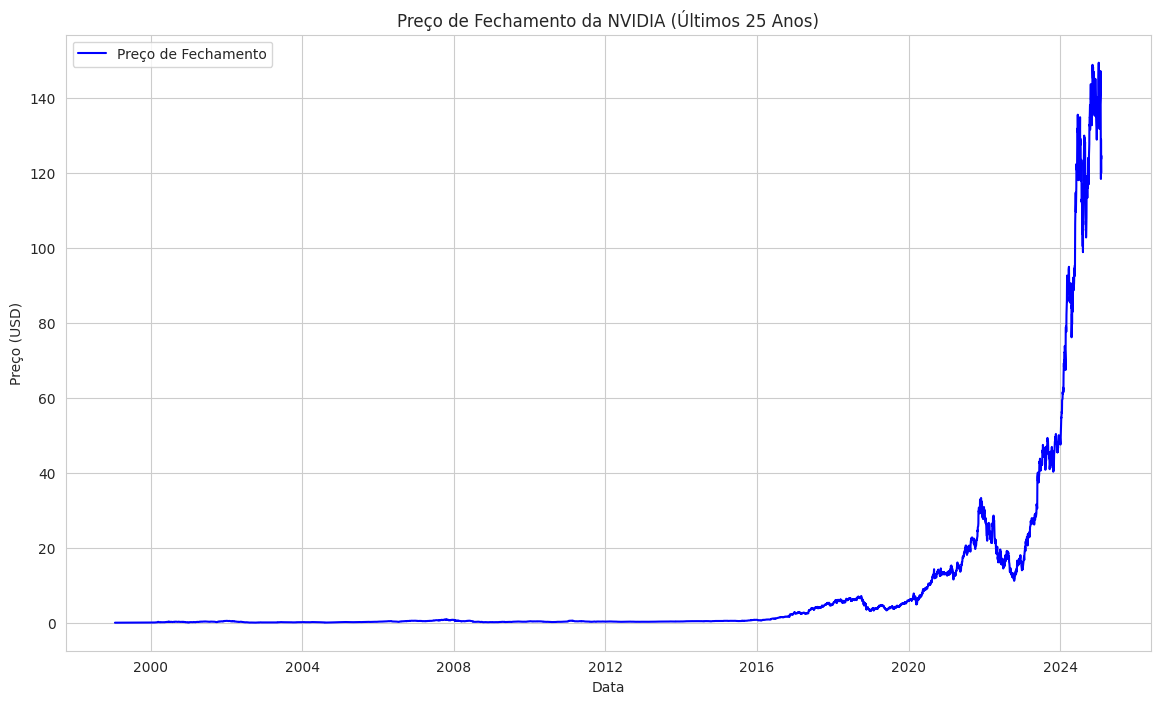

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Gráfico do preço de fechamento ao longo do tempo
plt.plot(df.index, df['Close'], label='Preço de Fechamento', color='blue')
plt.title('Preço de Fechamento da NVIDIA (Últimos 25 Anos)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

# **Gráfico de Retornos Diários**

 Indica a variação diária do preço, útil para entender a volatilidade.**

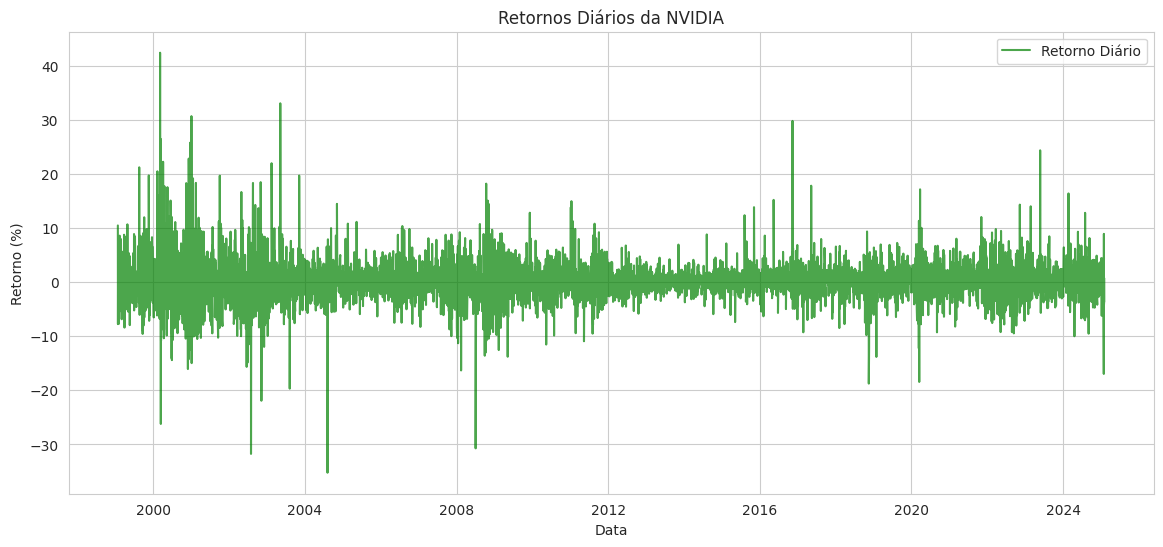

In [ ]:
# Calcular retornos diários
df['Retorno Diário'] = df['Close'].pct_change() * 100

# Gráfico dos retornos diários
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Retorno Diário'], label='Retorno Diário', color='green', alpha=0.7)
plt.title('Retornos Diários da NVIDIA')
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.legend()
plt.show()

# **Médias Móveis (MA50 e MA200)**
As médias móveis ajudam a identificar tendências de longo prazo. Vamos plotar a média móvel de 50 dias (curto prazo) e 200 dias (longo prazo).

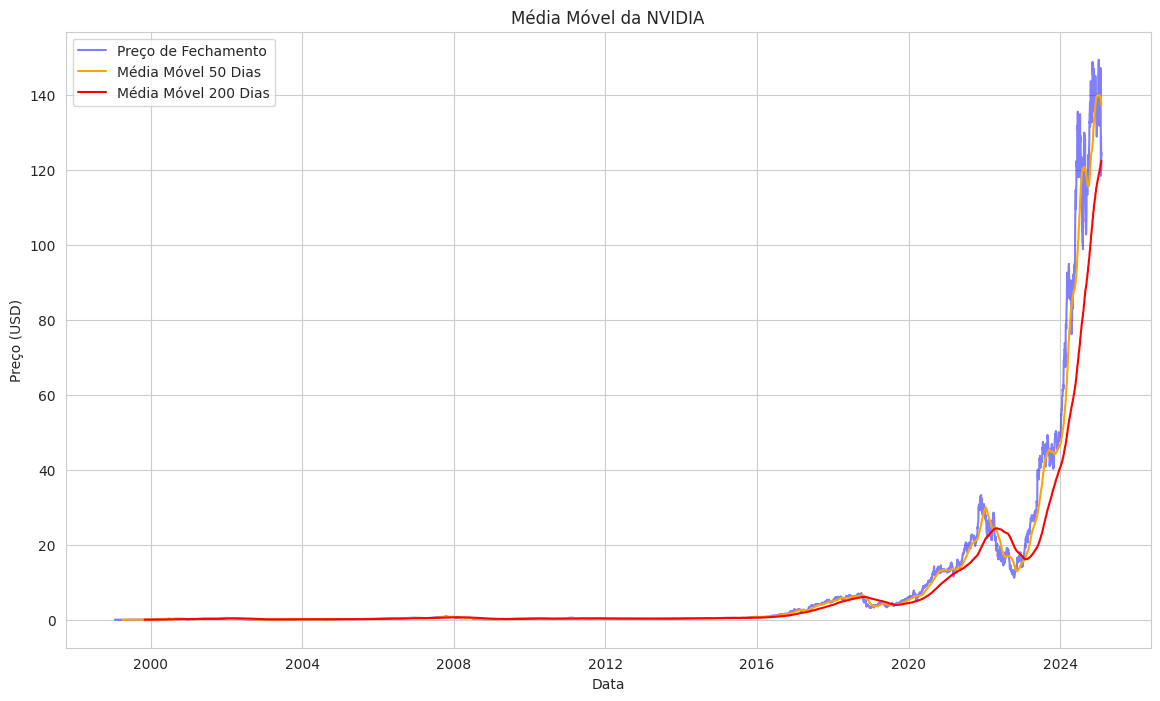

In [ ]:
# Calcular média móvel de 50 e 200 dias
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Gráfico da média móvel
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Close'], label='Preço de Fechamento', color='blue', alpha=0.5)
plt.plot(df.index, df['MA50'], label='Média Móvel 50 Dias', color='orange')
plt.plot(df.index, df['MA200'], label='Média Móvel 200 Dias', color='red')
plt.title('Média Móvel da NVIDIA')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

# **Bandas de Bollinger**
As Bandas de Bollinger são usadas para medir a volatilidade e identificar condições de sobrecompra ou sobrevenda.

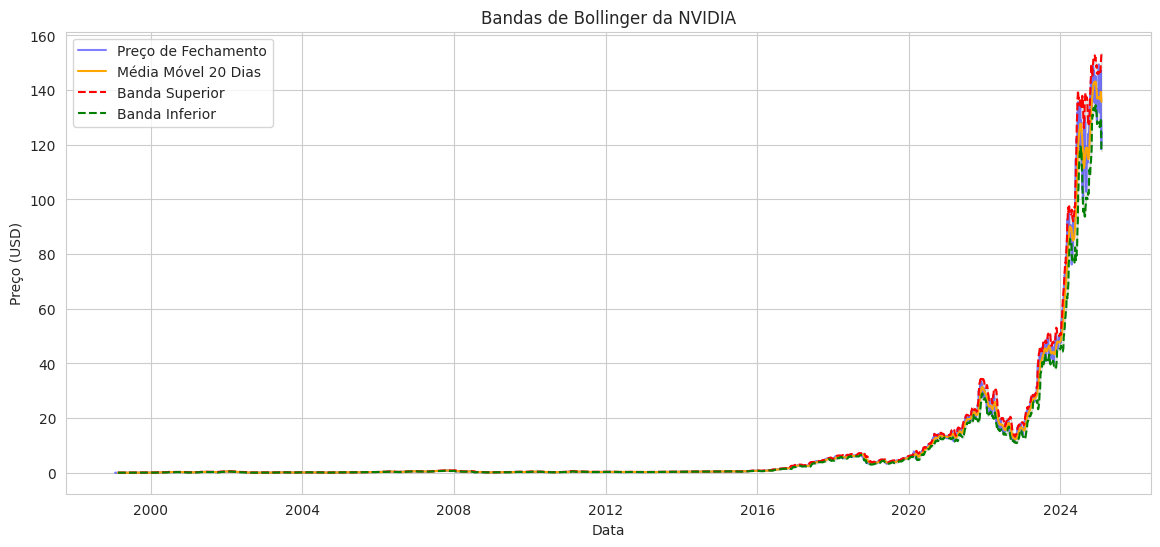

In [ ]:
# Calcular Bandas de Bollinger
df['MA20'] = df['Close'].rolling(window=20).mean()
df['STD20'] = df['Close'].rolling(window=20).std()
df['Banda Superior'] = df['MA20'] + (df['STD20'] * 2)
df['Banda Inferior'] = df['MA20'] - (df['STD20'] * 2)

# Gráfico das Bandas de Bollinger
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Preço de Fechamento', color='blue', alpha=0.5)
plt.plot(df.index, df['MA20'], label='Média Móvel 20 Dias', color='orange')
plt.plot(df.index, df['Banda Superior'], label='Banda Superior', color='red', linestyle='--')
plt.plot(df.index, df['Banda Inferior'], label='Banda Inferior', color='green', linestyle='--')
plt.fill_between(df.index, df['Banda Inferior'], df['Banda Superior'], color='gray', alpha=0.2)
plt.title('Bandas de Bollinger da NVIDIA')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

# **Volume de Negociação**
O volume de negociação indica a quantidade de ações negociadas em um dia. É útil para confirmar tendências.

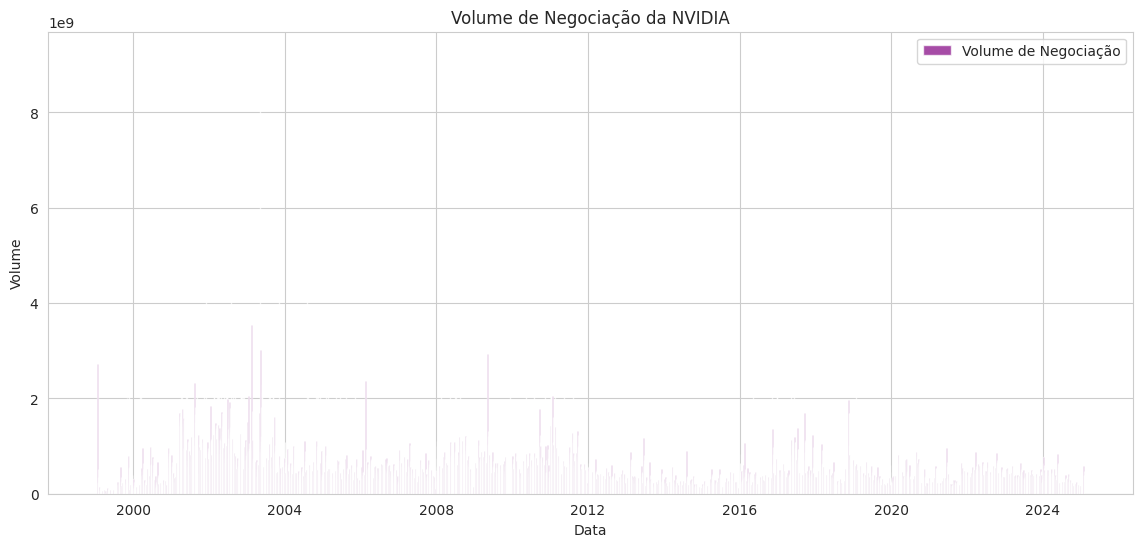

In [ ]:
# Gráfico do volume de negociação
plt.figure(figsize=(14, 6))
plt.bar(df.index, df['Volume'], label='Volume de Negociação', color='purple', alpha=0.7)
plt.title('Volume de Negociação da NVIDIA')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()
plt.show()

# **Volatilidade: Dá uma ideia do risco associado ao investimento.**

In [ ]:
# Calcular volatilidade anualizada
volatilidade_anualizada = df['Retorno Diário'].std() * (252 ** 0.5)  # 252 dias úteis no ano
print(f"Volatilidade Anualizada: {volatilidade_anualizada:.2f}%")

Volatilidade Anualizada: 60.06%


# **Incluindo correlações com variáveis macroeconômicas**

In [12]:
# Baixar dados do S&P 500 e do petróleo
sp500 = yf.Ticker("^GSPC")
oil = yf.Ticker("CL=F")

df_sp500 = sp500.history(period="max")
df_oil = oil.history(period="max")

# Selecionar apenas a coluna 'Close' para cada ativo
df_sp500 = df_sp500[['Close']].rename(columns={'Close': 'SP500'})
df_oil = df_oil[['Close']].rename(columns={'Close': 'Oil'})

# Juntar os dados com o dataframe da NVIDIA
df_full = df[['Close']].rename(columns={'Close': 'NVDA'})
df_full = df_full.join(df_sp500, how='inner')
df_full = df_full.join(df_oil, how='inner')

# Remover valores ausentes (se houver)
df_full.dropna(inplace=True)

# Mostrar as primeiras linhas
df_full.head()

,NVDA,SP500,Oil
Date,,,
2000-08-23 00:00:00-04:00,0.286351,1505.969971,32.049999
2000-08-24 00:00:00-04:00,0.293993,1508.310059,31.629999
2000-08-25 00:00:00-04:00,0.286589,1506.449951,32.049999
2000-08-28 00:00:00-04:00,0.298053,1514.089966,32.869999
2000-08-29 00:00:00-04:00,0.297336,1509.839966,32.720001


# **CALCULANDO CORRELAÇÕES**

           NVDA     SP500       Oil
NVDA   1.000000  0.777255  0.140957
SP500  0.777255  1.000000  0.186054
Oil    0.140957  0.186054  1.000000


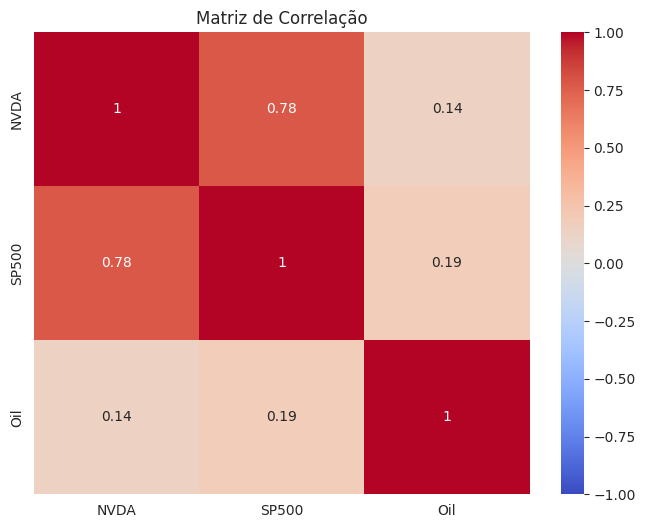

In [13]:
# Calcular correlações
correlacao = df_full.corr()

# Exibir a matriz de correlação
print(correlacao)

# Gráfico de heatmap da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

# **Gráficos de dispersão (scatter plots)**
Para visualizar melhor as relações, podemos criar gráficos de dispersão.

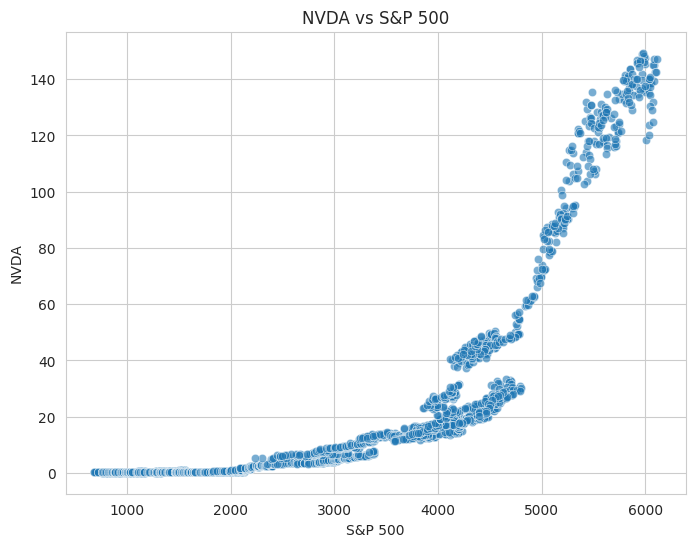

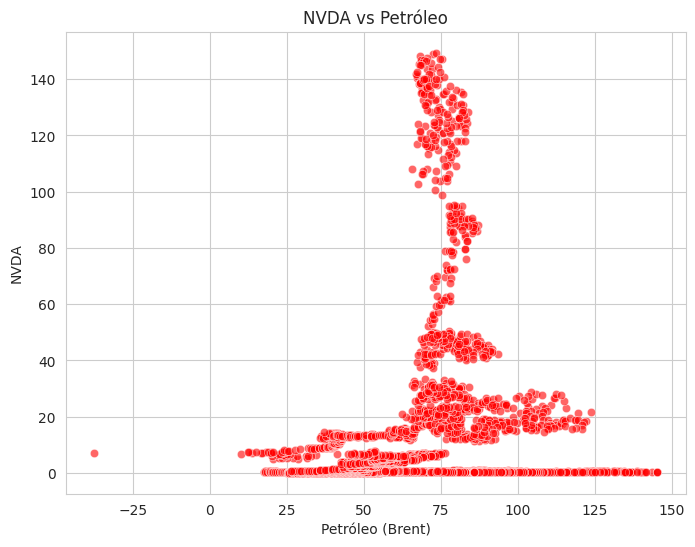

In [14]:
# Gráfico de dispersão: NVDA vs S&P 500
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_full['SP500'], y=df_full['NVDA'], alpha=0.6)
plt.title('NVDA vs S&P 500')
plt.xlabel('S&P 500')
plt.ylabel('NVDA')
plt.show()

# Gráfico de dispersão: NVDA vs Petróleo
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_full['Oil'], y=df_full['NVDA'], alpha=0.6, color='red')
plt.title('NVDA vs Petróleo')
plt.xlabel('Petróleo (Brent)')
plt.ylabel('NVDA')
plt.show()

# **CONCLUSÃO DESTE ANALISTA**

Após toda essa análise, podemos tirar algumas conclusões importantes sobre o comportamento do preço da NVIDIA (NVDA) e sua relação com variáveis macroeconômicas e outras métricas financeiras. Vamos resumir os principais pontos:

1. Comportamento do Preço da NVIDIA
O preço da NVIDIA apresentou uma tendência de crescimento significativo ao longo dos últimos 25 anos, com períodos de volatilidade (especialmente durante crises financeiras ou eventos macroeconômicos).

A média móvel de 200 dias (MA200) atuou como um suporte importante durante tendências de alta, enquanto a média móvel de 50 dias (MA50) serviu como um indicador de tendências de curto prazo.

As Bandas de Bollinger mostraram períodos de alta volatilidade (quando as bandas se alargam) e períodos de consolidação (quando as bandas se estreitam).

2. Correlação com o S&P 500
A NVIDIA apresentou uma correlação positiva forte com o índice S&P 500. Isso indica que a NVIDIA tende a se mover na mesma direção que o mercado de ações como um todo.

Em períodos de alta do mercado, a NVIDIA tende a se valorizar, enquanto em períodos de crise ou correção do mercado, a NVIDIA pode sofrer quedas significativas.

Isso sugere que a NVIDIA é uma ação sensível ao sentimento do mercado e ao risco sistêmico.

3. Correlação com o Preço do Petróleo
A correlação entre a NVIDIA e o preço do petróleo foi fraca ou negativa. Isso indica que a NVIDIA não é diretamente impactada por choques no preço do petróleo.

No entanto, em períodos de alta do petróleo (associados a inflação ou riscos geopolíticos), a NVIDIA pode sofrer indiretamente devido ao aumento dos custos de produção ou ao impacto negativo no mercado de ações como um todo.

4. Volatilidade
A volatilidade anualizada da NVIDIA foi relativamente alta, o que é comum em ações de tecnologia e crescimento. Isso significa que a NVIDIA pode oferecer retornos atrativos, mas também apresenta riscos significativos.

Investidores devem estar preparados para oscilações de curto prazo, especialmente em momentos de incerteza macroeconômica.

5. Volume de Negociação
O volume de negociação da NVIDIA aumentou significativamente ao longo dos anos, especialmente durante períodos de alta volatilidade ou lançamentos de produtos importantes (como GPUs ou tecnologias de IA).

Picos de volume podem indicar momentos de interesse crescente no ativo, seja por parte de investidores institucionais ou varejo.

6. Relação com Taxas de Juros (se incluído na análise)
Se você incluiu dados de taxas de juros (como o yield dos títulos do Tesouro dos EUA), é provável que a NVIDIA tenha apresentado uma correlação negativa com as taxas de juros. Isso ocorre porque ações de crescimento, como a NVIDIA, são sensíveis a aumentos nas taxas de juros, que reduzem o valor presente dos fluxos de caixa futuros.

Em períodos de alta nas taxas de juros, a NVIDIA pode sofrer pressões de venda, enquanto em períodos de juros baixos, a ação tende a se beneficiar.

7. Conclusão Geral
A NVIDIA é uma ação de tecnologia com forte tendência de crescimento, mas também com alta volatilidade e sensibilidade ao mercado de ações e condições macroeconômicas.

A correlação positiva com o S&P 500 sugere que a NVIDIA é uma boa opção para investidores que acreditam em um mercado de ações em alta, mas pode não ser a melhor escolha em períodos de recessão ou correção do mercado.

A fraca correlação com o petróleo indica que a NVIDIA não é diretamente impactada por choques energéticos, mas pode sofrer indiretamente devido a efeitos inflacionários ou de risco sistêmico.

A volatilidade e a sensibilidade às taxas de juros reforçam a importância de diversificar o portfólio e considerar o horizonte de investimento.

Recomendações para Investidores
Diversificação: Inclua a NVIDIA em um portfólio diversificado para reduzir o risco associado à volatilidade da ação.

Monitoramento de Mercado: Fique atento a indicadores macroeconômicos, como taxas de juros, inflação e desempenho do mercado de ações (S&P 500).

Horizonte de Longo Prazo: A NVIDIA pode ser uma boa opção para investidores com horizonte de longo prazo, dada sua tendência histórica de crescimento.

Gestão de Risco: Utilize ferramentas como médias móveis e Bandas de Bollinger para identificar pontos de entrada e saída, e considere stop-loss para limitar perdas